In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("car data.csv")

In [8]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [12]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
df.shape

(301, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [24]:
###checking the distribution of catagorical data
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [22]:
df.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [23]:
df.	Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [26]:
## encoding "catagorical data in to numerical" this data is nominal so OneHotEncoding
en_data = df[["Fuel_Type","Seller_Type","Transmission"]]
pd.get_dummies(en_data)

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,False,False,True,True,False,False,True
1,False,True,False,True,False,False,True
2,False,False,True,True,False,False,True
3,False,False,True,True,False,False,True
4,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...
296,False,True,False,True,False,False,True
297,False,False,True,True,False,False,True
298,False,False,True,True,False,False,True
299,False,True,False,True,False,False,True


In [36]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first")
array = ohe.fit_transform(en_data).toarray()
array

array([[0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.]])

In [46]:
encoded = pd.DataFrame(array,columns=ohe.get_feature_names_out(["Fuel_Type","Seller_Type","Transmission"]))
encoded

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
296,1.0,0.0,0.0,1.0
297,0.0,1.0,0.0,1.0
298,0.0,1.0,0.0,1.0
299,1.0,0.0,0.0,1.0


In [47]:
###drop before colum form our dataset
old_column = df.drop(["Fuel_Type", "Seller_Type", "Transmission"], axis=1)
old_column

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,ritz,2014,3.35,5.59,27000,0
1,sx4,2013,4.75,9.54,43000,0
2,ciaz,2017,7.25,9.85,6900,0
3,wagon r,2011,2.85,4.15,5200,0
4,swift,2014,4.60,6.87,42450,0
...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0
297,brio,2015,4.00,5.90,60000,0
298,city,2009,3.35,11.00,87934,0
299,city,2017,11.50,12.50,9000,0


In [59]:
### concate dataset with new encoded data
final_df = pd.concat([old_column,encoded],axis=1)
final_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0.0,1.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,0,1.0,0.0,0.0,1.0
2,ciaz,2017,7.25,9.85,6900,0,0.0,1.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,0,0.0,1.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1.0,0.0,0.0,1.0
297,brio,2015,4.00,5.90,60000,0,0.0,1.0,0.0,1.0
298,city,2009,3.35,11.00,87934,0,0.0,1.0,0.0,1.0
299,city,2017,11.50,12.50,9000,0,1.0,0.0,0.0,1.0


In [67]:
x=final_df.drop(["Car_Name","Selling_Price"],axis=1)
y=final_df["Selling_Price"]

In [71]:
### splitind data into 80-20 ration

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [73]:
x_train

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
27,2017,6.49,16200,0,0.0,1.0,1.0,1.0
220,2017,4.43,38488,0,0.0,1.0,0.0,1.0
188,2013,0.57,18000,0,0.0,1.0,1.0,1.0
78,2010,22.83,80000,0,0.0,1.0,0.0,0.0
289,2016,13.60,10980,0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
82,2017,25.39,15000,0,1.0,0.0,0.0,0.0
228,2012,9.40,60000,0,1.0,0.0,0.0,1.0
184,2008,0.75,26000,1,0.0,1.0,1.0,1.0
202,2015,5.70,28200,0,0.0,1.0,0.0,1.0


In [88]:
y_train

27      6.00
220     3.50
188     0.25
78      5.25
289    10.11
       ...  
82     23.00
228     4.95
184     0.25
202     4.40
266     3.65
Name: Selling_Price, Length: 240, dtype: float64

In [74]:
from sklearn.linear_model import LinearRegression

In [80]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [84]:
#*
predictions = lr.predict(x_test)
predictions

array([ 3.54529301,  7.47261212,  4.26271916,  5.23040844,  5.29506465,
        4.43643811,  8.38952426,  2.26697305,  4.50690338, -0.03677221,
        0.77593666, -2.32715261,  0.86534121,  5.36427935,  5.16586157,
       10.08878199,  4.68577533,  1.5571624 ,  2.78196337,  2.50718103,
        3.25132109, -0.94706866,  0.88786744,  3.77678287,  2.62029499,
        9.51314718,  1.12468477,  2.0461332 ,  4.09297568,  3.51652489,
        1.06890803,  6.62792193,  4.10241642,  6.35521366,  2.65507418,
        5.40634568,  6.54289372,  4.48818037,  4.28034599,  5.79582161,
        9.17713541,  2.10407958,  6.31699413,  3.56885852,  0.25954591,
        7.73852778,  9.98029189,  4.68507026,  7.09801082,  7.45677738,
        5.14742601,  4.29829797,  3.0608042 , 11.38080056,  2.32378138,
        2.10331432,  4.82521837,  1.0923387 , -0.53186541,  2.05159459,
        5.83550756])

In [85]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [86]:
print("MSE: ",mean_squared_error(predictions,y_test))
print("MSE: ",mean_absolute_error(predictions,y_test))
print("MSE: ",r2_score(predictions,y_test))

MSE:  1.776233003298917
MSE:  1.0267645359464541
MSE:  0.7831032873934699


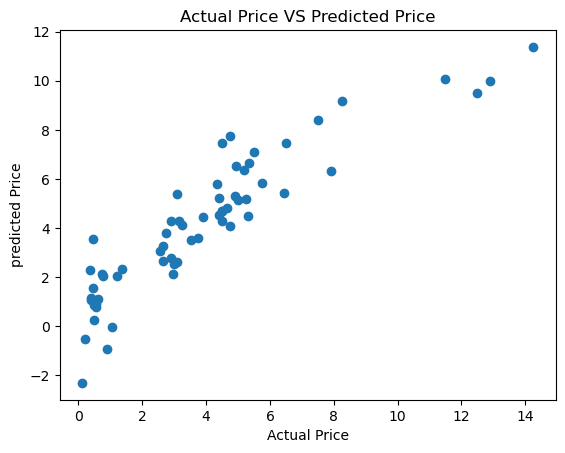

In [89]:
### now w erepresent thuis in graph
plt.scatter(y_test,predictions)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual Price VS Predicted Price")
plt.show()

In [90]:
import os

In [91]:
os.getcwd()

'C:\\Users\\HP\\data'